In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import lightgbm as lgb
from catboost import CatBoostRegressor

In [2]:
#!pip install catboost

In [3]:
df_train= pd.read_csv(r'F:\Final Year project\DATASET\Train.csv')
df_test= pd.read_csv(r'F:\Final Year project\DATASET\Test.csv')

In [4]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_train.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

Outlet_Size is catagorical column so we fill it with Mode Imputation

In [14]:
df_train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df_train['Outlet_Size'].mode()


0    Medium
Name: Outlet_Size, dtype: object

In [16]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [17]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#Feature Selection

In [19]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [20]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

EDA with KLIB

In [21]:
import klib

GridSpec(6, 5)

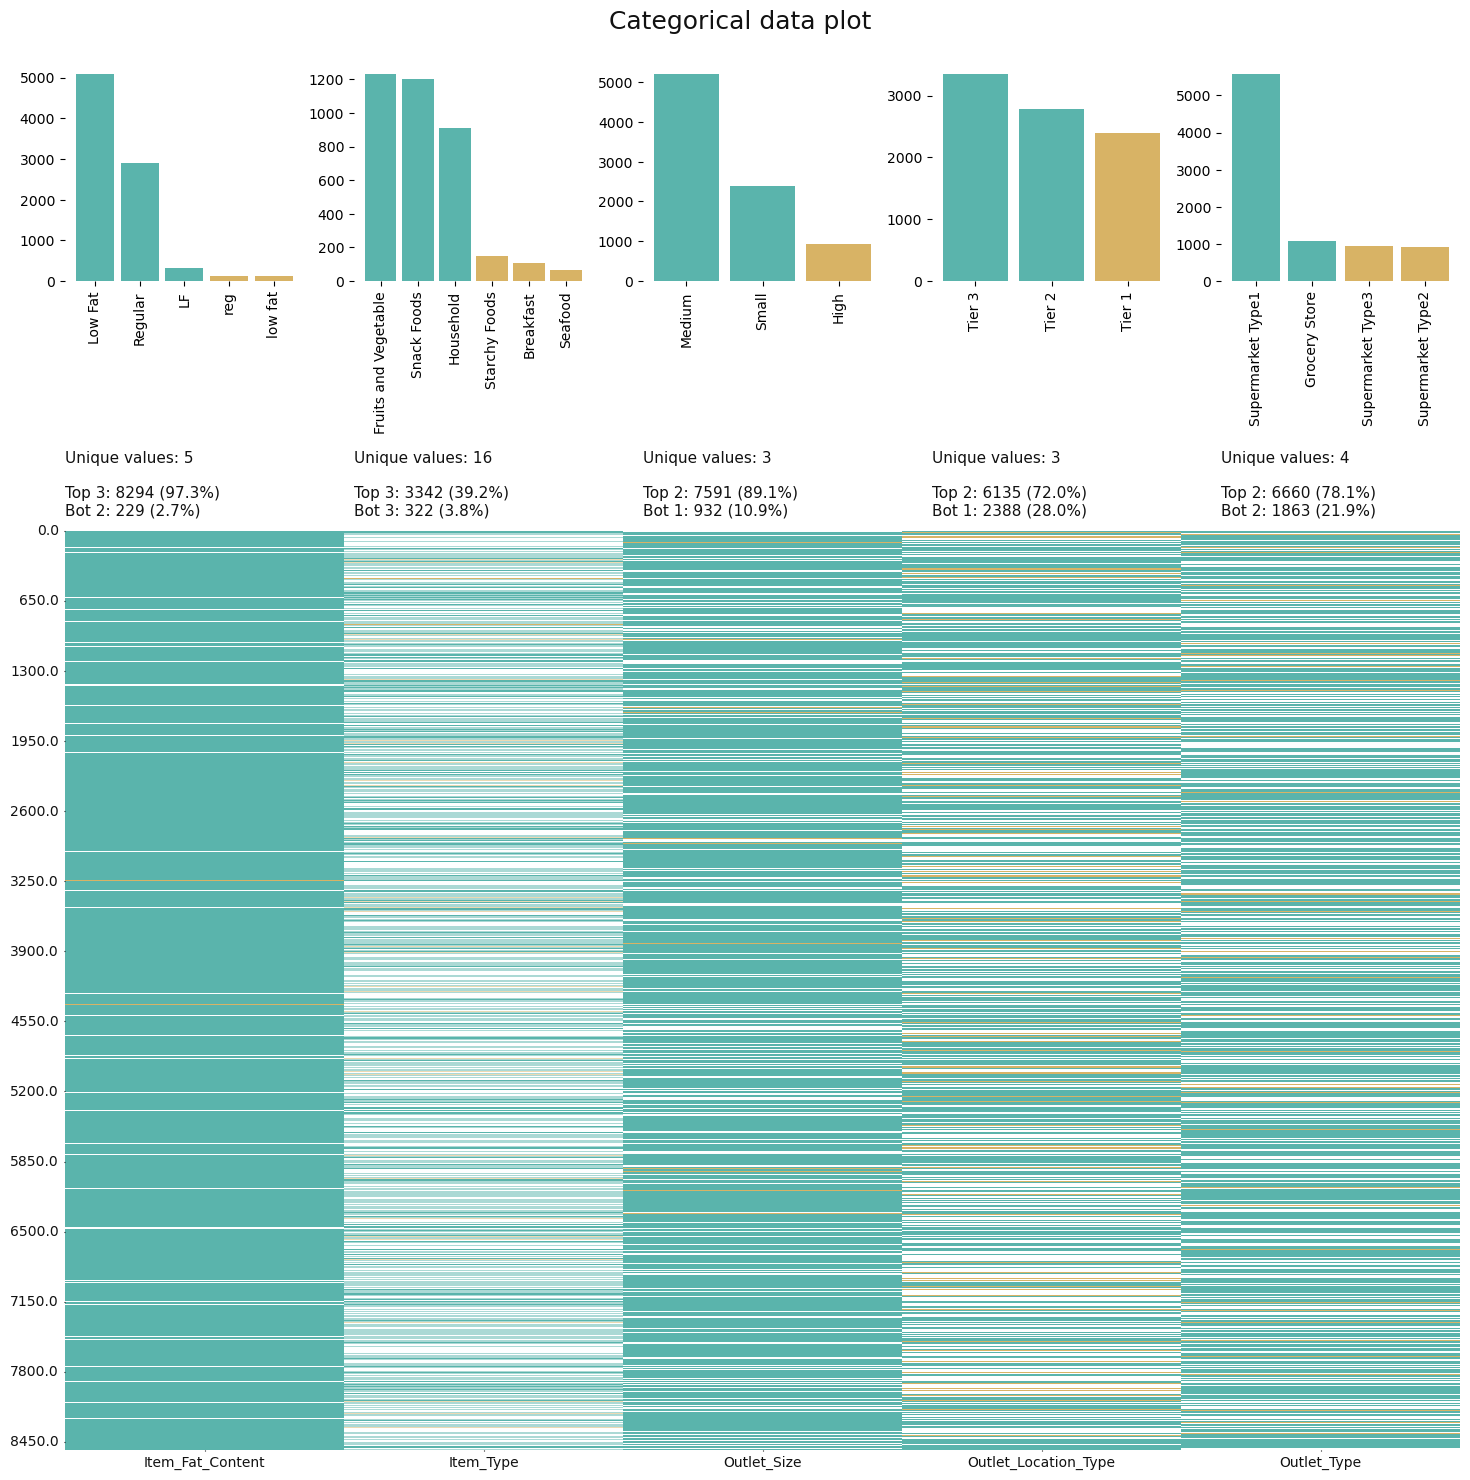

In [22]:
klib.cat_plot(df_train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

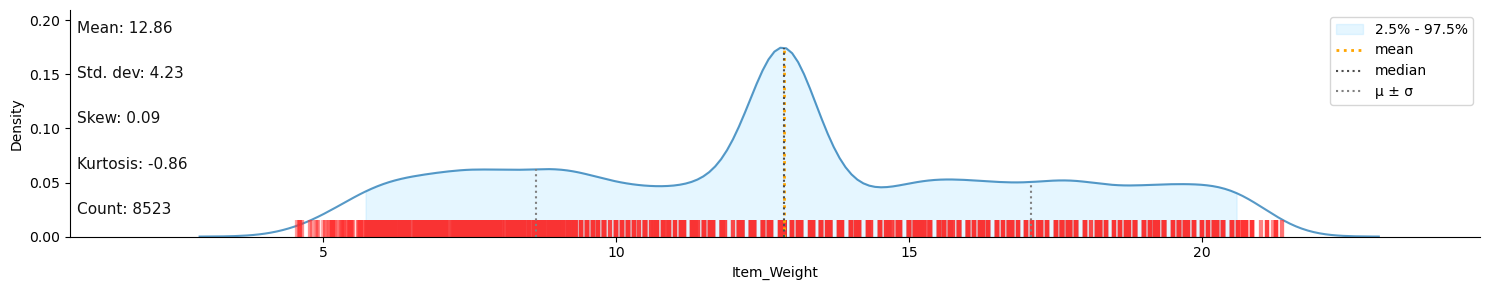

In [23]:
klib.dist_plot(df_train)

In [24]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


EDA with DTale 

In [25]:
import dtale as dt
df_train_show= pd.read_csv(r'F:\Final Year project\DATASET\Train.csv')

In [26]:
ds=dt.show(df_train_show)
ds

C:\Users\HP\anaconda3\lib\site-packages\dtale\views.py:785: FutureWarning:

['Outlet_Size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



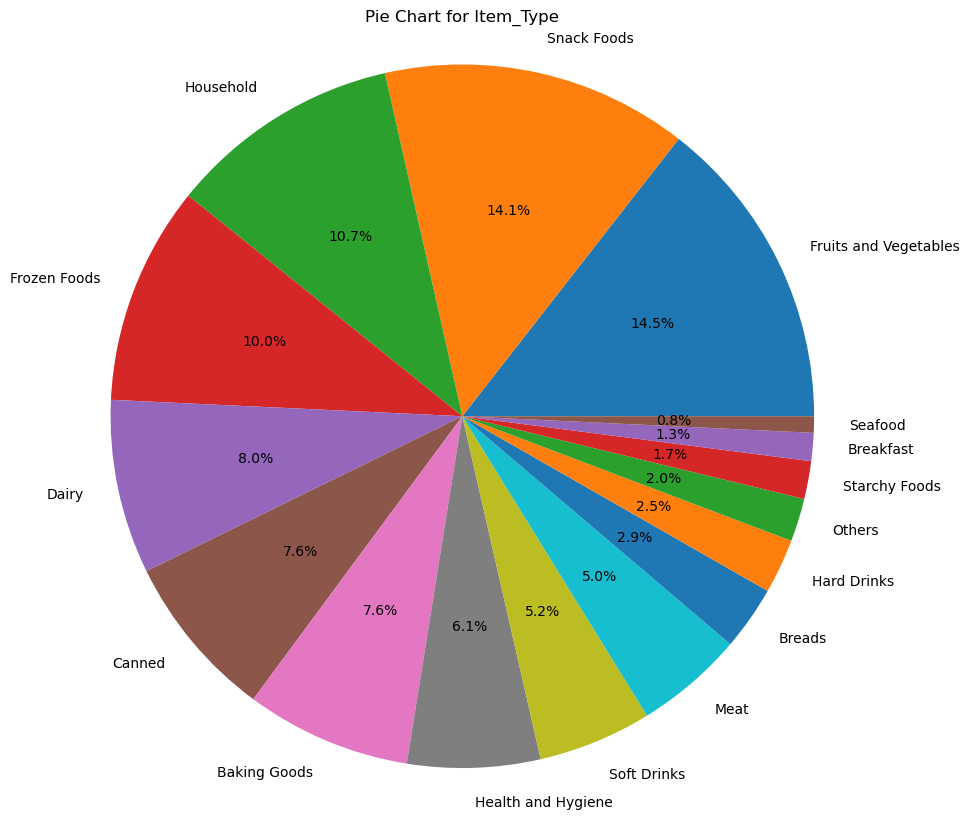

C:\Users\HP\anaconda3\lib\site-packages\dtale\views.py:785: FutureWarning:

['Outlet_Size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [27]:
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your dataset file)
data = pd.read_csv(r'F:\Final Year project\DATASET\Train.csv')

# Choose the column you want to create a pie chart for (replace 'column_name' with the actual column name)
column_name = 'Item_Type'

# Calculate the value counts for the selected column
value_counts = data[column_name].value_counts()

# Plot a pie chart using matplotlib
plt.figure(figsize=(10, 10))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title(f'Pie Chart for {column_name}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the pie chart
plt.show()

# Create a D-Tale data frame for further data exploration
d= dt.show(data)


Data Cleaning using Klib Library

In [28]:
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [29]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [31]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [32]:
klib.mv_col_handling(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


Preprocessing Task before Model Building

1) Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [34]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


2) Splitting our data into train and test

In [35]:
df_test.shape


(5681, 9)

In [36]:
df_train.shape


(8523, 10)

In [37]:
X=df_train.drop('item_outlet_sales',axis=1)

In [38]:
Y=df_train['item_outlet_sales']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

3) Standarization

In [40]:
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858088,1.369354,0.066132,7.226681,140.992767,1997.831867,1.170832,1.112871,1.201220
std,4.226130,0.644810,0.051598,4.209990,62.275051,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012802,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [41]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [42]:
X_train_std= sc.fit_transform(X_train)

In [43]:
X_test_std= sc.fit_transform(X_test)


In [44]:
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [45]:
X_test_std

array([[-0.44354743, -0.56892467, -0.19860257, ..., -0.26815662,
         1.1067281 ,  1.07886076],
       [ 1.18274465, -0.56892467, -0.51369355, ..., -1.92470387,
         1.1067281 , -0.22387125],
       [-1.20558148,  0.99561817,  0.18237795, ...,  1.38839063,
        -1.38596862, -0.22387125],
       ...,
       [ 0.62515889, -0.56892467,  0.90184011, ..., -0.26815662,
         1.1067281 , -1.52660325],
       [ 0.97365005, -0.56892467, -1.27256347, ..., -0.26815662,
         1.1067281 ,  1.07886076],
       [-1.54477944,  0.99561817, -1.08005617, ..., -0.26815662,
        -0.13962026, -0.22387125]])

In [46]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [47]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [ ]:
joblib.dump(sc,r'F:\Final _year\Backend\Model\sc.sav')


Model Building

In [48]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [49]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [50]:
X_test.head()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.000000,1,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,1,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,2,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,1,0.049035,6,39.950600,2007,1,1,1
6954,7.550000,1,0.027225,3,152.934006,2002,1,1,1


In [51]:
Y_pred_lr=lr.predict(X_test_std)
Y_pred_lr

array([2110.22755889, 2147.54273582, 1241.33075705, ..., 1253.40857534,
       2425.63758608, 2378.49866902])

In [52]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [54]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5020054027842016
885.7810693115644
1164.9965286795389


In [55]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [56]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [57]:
Y_pred_rf= rf.predict(X_test_std)

In [58]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5508470983445566
777.9732055694648
1106.3930031042944


Grid search forest

In [59]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)
# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.505 (0.005) with: {'n_estimators': 10}
0.545 (0.008) with: {'n_estimators': 100}
0.550 (0.006) with: {'n_estimators': 1000}


In [60]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [61]:
grid_search_forest.best_score_

0.5499872819102556

In [62]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [63]:
r2_score(Y_test,Y_pred_rf_grid)

0.5513205864030938

Saving model

In [64]:
import joblib

In [65]:
joblib.dump(grid_search_forest,r'C:\Users\HP\Desktop\Final_Year_Project\Model\grid_search_forest.sav')

['C:\\Users\\HP\\Desktop\\Final_Year_Project\\Model\\grid_search_forest.sav']

In [66]:
model=joblib.load(r'C:\Users\HP\Desktop\Final_Year_Project\Model\grid_search_forest.sav')


In [67]:
model

GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)

XGBoost

In [68]:
#!pip install xgboost

In [69]:
from xgboost import XGBRegressor

In [70]:
regressor = XGBRegressor(n_estimators=1000)

In [71]:
regressor.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
Y_pred_xg= regressor.predict(X_train_std)

In [73]:
r2_train = metrics.r2_score(Y_train, Y_pred_xg)

In [74]:
print("**********XGBOOST**********")
print("Accuracy=",r2_train*100,"%")
print("MAE=",mean_absolute_error(Y_train,Y_pred_xg))
print("MSE=",np.sqrt(mean_squared_error(Y_train,Y_pred_xg)))

**********XGBOOST**********
Accuracy= 99.91557830536516 %
MAE= 32.8573
MSE= 49.961803


In [75]:
model=joblib.dump(Y_pred_xg,r'C:\Users\HP\Desktop\Final_Year_Project\Model\XGBoost.sav')

LGBM Regression

In [76]:
lgbm = lgb.LGBMRegressor()

In [77]:
lgbm.fit(X_train_std,Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 9
[LightGBM] [Info] Start training from score 2199.293549


LGBMRegressor()

In [78]:
Y_pred_lgbm=lgbm.predict(X_test_std)
Y_pred_lgbm

array([1398.0627956 , 2830.18841781, 1299.36772692, ...,  543.86636112,
       1610.98569548, 2399.4302562 ])

In [79]:
print(r2_score(Y_test,Y_pred_lgbm))
print(mean_absolute_error(Y_test,Y_pred_lgbm))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lgbm)))

0.5673290239805946
762.2703343235787
1085.9034112106706


CatBoost

In [80]:
cb = CatBoostRegressor(learning_rate=0.01)

In [81]:
cb.fit(X_train_std, Y_train)

0:	learn: 1710.3596652	total: 116ms	remaining: 1m 56s
1:	learn: 1701.2680072	total: 121ms	remaining: 1m
2:	learn: 1692.2570764	total: 127ms	remaining: 42.2s
3:	learn: 1683.4341337	total: 131ms	remaining: 32.6s
4:	learn: 1674.5914161	total: 136ms	remaining: 27s
5:	learn: 1665.5305584	total: 143ms	remaining: 23.6s
6:	learn: 1656.5081772	total: 148ms	remaining: 20.9s
7:	learn: 1647.5417151	total: 152ms	remaining: 18.9s
8:	learn: 1638.7455780	total: 161ms	remaining: 17.7s
9:	learn: 1630.5118241	total: 165ms	remaining: 16.4s
10:	learn: 1622.4840756	total: 170ms	remaining: 15.3s
11:	learn: 1614.5076629	total: 177ms	remaining: 14.5s
12:	learn: 1606.2534637	total: 182ms	remaining: 13.8s
13:	learn: 1598.5405712	total: 188ms	remaining: 13.3s
14:	learn: 1590.7281508	total: 193ms	remaining: 12.7s
15:	learn: 1582.8182282	total: 198ms	remaining: 12.2s
16:	learn: 1574.9364263	total: 204ms	remaining: 11.8s
17:	learn: 1567.2458021	total: 209ms	remaining: 11.4s
18:	learn: 1559.6696233	total: 213ms	remai

155:	learn: 1130.2978230	total: 1.08s	remaining: 5.85s
156:	learn: 1129.4640505	total: 1.09s	remaining: 5.86s
157:	learn: 1128.6734270	total: 1.1s	remaining: 5.85s
158:	learn: 1127.8277222	total: 1.12s	remaining: 5.91s
159:	learn: 1126.9690773	total: 1.12s	remaining: 5.91s
160:	learn: 1126.2340359	total: 1.13s	remaining: 5.89s
161:	learn: 1125.4836183	total: 1.14s	remaining: 5.89s
162:	learn: 1124.6215450	total: 1.14s	remaining: 5.87s
163:	learn: 1123.9170957	total: 1.15s	remaining: 5.87s
164:	learn: 1123.1011029	total: 1.16s	remaining: 5.85s
165:	learn: 1122.3031544	total: 1.16s	remaining: 5.83s
166:	learn: 1121.5182442	total: 1.17s	remaining: 5.82s
167:	learn: 1120.7044353	total: 1.18s	remaining: 5.82s
168:	learn: 1120.0076883	total: 1.18s	remaining: 5.82s
169:	learn: 1119.3053448	total: 1.19s	remaining: 5.8s
170:	learn: 1118.6331307	total: 1.2s	remaining: 5.81s
171:	learn: 1117.9743033	total: 1.22s	remaining: 5.9s
172:	learn: 1117.2919798	total: 1.23s	remaining: 5.89s
173:	learn: 11

326:	learn: 1074.8512666	total: 2.54s	remaining: 5.24s
327:	learn: 1074.7485612	total: 2.55s	remaining: 5.23s
328:	learn: 1074.6293617	total: 2.56s	remaining: 5.22s
329:	learn: 1074.5162571	total: 2.56s	remaining: 5.21s
330:	learn: 1074.4081394	total: 2.57s	remaining: 5.2s
331:	learn: 1074.3222795	total: 2.58s	remaining: 5.19s
332:	learn: 1074.2090723	total: 2.58s	remaining: 5.18s
333:	learn: 1074.0965659	total: 2.59s	remaining: 5.17s
334:	learn: 1074.0326770	total: 2.6s	remaining: 5.16s
335:	learn: 1073.9672743	total: 2.6s	remaining: 5.15s
336:	learn: 1073.8434449	total: 2.61s	remaining: 5.13s
337:	learn: 1073.6735436	total: 2.62s	remaining: 5.12s
338:	learn: 1073.6021294	total: 2.63s	remaining: 5.12s
339:	learn: 1073.4633913	total: 2.63s	remaining: 5.11s
340:	learn: 1073.3554051	total: 2.64s	remaining: 5.1s
341:	learn: 1073.1983713	total: 2.64s	remaining: 5.09s
342:	learn: 1073.0860896	total: 2.67s	remaining: 5.12s
343:	learn: 1073.0075364	total: 2.68s	remaining: 5.11s
344:	learn: 10

500:	learn: 1060.2759592	total: 4.03s	remaining: 4.01s
501:	learn: 1060.1932889	total: 4.08s	remaining: 4.04s
502:	learn: 1060.1779464	total: 4.08s	remaining: 4.03s
503:	learn: 1060.1276643	total: 4.09s	remaining: 4.02s
504:	learn: 1060.0999216	total: 4.1s	remaining: 4.02s
505:	learn: 1060.0271968	total: 4.11s	remaining: 4.01s
506:	learn: 1059.9100208	total: 4.14s	remaining: 4.02s
507:	learn: 1059.8351150	total: 4.14s	remaining: 4.01s
508:	learn: 1059.7363018	total: 4.15s	remaining: 4s
509:	learn: 1059.6426335	total: 4.16s	remaining: 3.99s
510:	learn: 1059.5719646	total: 4.16s	remaining: 3.98s
511:	learn: 1059.4926274	total: 4.17s	remaining: 3.97s
512:	learn: 1059.4129507	total: 4.17s	remaining: 3.96s
513:	learn: 1059.3078968	total: 4.18s	remaining: 3.95s
514:	learn: 1059.2774609	total: 4.19s	remaining: 3.94s
515:	learn: 1059.2236075	total: 4.2s	remaining: 3.94s
516:	learn: 1059.2211026	total: 4.2s	remaining: 3.92s
517:	learn: 1059.1127166	total: 4.21s	remaining: 3.92s
518:	learn: 1059

669:	learn: 1049.3039893	total: 5.39s	remaining: 2.66s
670:	learn: 1049.1798464	total: 5.4s	remaining: 2.65s
671:	learn: 1049.1377309	total: 5.41s	remaining: 2.64s
672:	learn: 1049.1078384	total: 5.42s	remaining: 2.63s
673:	learn: 1049.0253339	total: 5.42s	remaining: 2.62s
674:	learn: 1048.9734706	total: 5.43s	remaining: 2.61s
675:	learn: 1048.9037866	total: 5.44s	remaining: 2.6s
676:	learn: 1048.8535066	total: 5.44s	remaining: 2.6s
677:	learn: 1048.8171839	total: 5.45s	remaining: 2.59s
678:	learn: 1048.7664534	total: 5.45s	remaining: 2.58s
679:	learn: 1048.7109903	total: 5.48s	remaining: 2.58s
680:	learn: 1048.6575440	total: 5.49s	remaining: 2.57s
681:	learn: 1048.6313239	total: 5.5s	remaining: 2.56s
682:	learn: 1048.5583266	total: 5.5s	remaining: 2.55s
683:	learn: 1048.4677940	total: 5.51s	remaining: 2.54s
684:	learn: 1048.4257525	total: 5.52s	remaining: 2.54s
685:	learn: 1048.3898846	total: 5.52s	remaining: 2.53s
686:	learn: 1048.3572960	total: 5.53s	remaining: 2.52s
687:	learn: 104

837:	learn: 1038.7736695	total: 6.75s	remaining: 1.3s
838:	learn: 1038.6919750	total: 6.76s	remaining: 1.3s
839:	learn: 1038.6224039	total: 6.77s	remaining: 1.29s
840:	learn: 1038.5360475	total: 6.78s	remaining: 1.28s
841:	learn: 1038.4442632	total: 6.79s	remaining: 1.27s
842:	learn: 1038.3505278	total: 6.79s	remaining: 1.26s
843:	learn: 1038.3316365	total: 6.8s	remaining: 1.26s
844:	learn: 1038.2605855	total: 6.8s	remaining: 1.25s
845:	learn: 1038.1080193	total: 6.81s	remaining: 1.24s
846:	learn: 1038.0435680	total: 6.82s	remaining: 1.23s
847:	learn: 1038.0072560	total: 6.82s	remaining: 1.22s
848:	learn: 1037.9298198	total: 6.83s	remaining: 1.22s
849:	learn: 1037.8355111	total: 6.84s	remaining: 1.21s
850:	learn: 1037.7895284	total: 6.85s	remaining: 1.2s
851:	learn: 1037.7089260	total: 6.85s	remaining: 1.19s
852:	learn: 1037.6314171	total: 6.86s	remaining: 1.18s
853:	learn: 1037.6094116	total: 6.87s	remaining: 1.17s
854:	learn: 1037.5272883	total: 6.87s	remaining: 1.17s
855:	learn: 103

993:	learn: 1028.3648853	total: 8.11s	remaining: 49ms
994:	learn: 1028.3147816	total: 8.12s	remaining: 40.8ms
995:	learn: 1028.2534970	total: 8.12s	remaining: 32.6ms
996:	learn: 1028.2005558	total: 8.13s	remaining: 24.5ms
997:	learn: 1028.1398766	total: 8.14s	remaining: 16.3ms
998:	learn: 1028.1180905	total: 8.15s	remaining: 8.16ms
999:	learn: 1028.0366247	total: 8.18s	remaining: 0us


In [82]:
Y_pred_cb = cb.predict(X_test_std)

In [83]:
print(r2_score(Y_test,Y_pred_cb))
print(mean_absolute_error(Y_test,Y_pred_cb))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_cb)))

0.5987585966142573
739.5195592342648
1045.7194507564568


Comparison

In [84]:
print("**********Linear Regressor**********")
print("Accuracy=",r2_score(Y_test,Y_pred_lr)*100,"%")
print("MAE=",mean_absolute_error(Y_test,Y_pred_lr))
print("MSE=",np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))
print("**********RandomForestRegressor**********")
print("Accuracy=",r2_score(Y_test,Y_pred_rf)*100,"%")
print("MAE=",mean_absolute_error(Y_test,Y_pred_rf))
print("MSE=",np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))
print("**********Grid search forest**********")
print("Accuracy=",r2_score(Y_test,Y_pred_rf_grid)*100,"%")
print("MAE=",mean_absolute_error(Y_test,Y_pred_rf_grid))
print("MSE=",np.sqrt(mean_squared_error(Y_test,Y_pred_rf_grid)))
print("**********LGBM**********")
print("Accuracy=",r2_score(Y_test,Y_pred_lgbm)*100,"%")
print(mean_absolute_error(Y_test,Y_pred_lgbm))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lgbm)))
print("**********CatBoost**********")
print("Accuracy=",r2_score(Y_test,Y_pred_cb)*100,"%")
print(mean_absolute_error(Y_test,Y_pred_cb))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_cb)))
print("**********XGBOOST**********")
print("Accuracy=",r2_train*100,"%")
print("MAE=",mean_absolute_error(Y_train,Y_pred_xg))
print("MSE=",np.sqrt(mean_squared_error(Y_train,Y_pred_xg)))



**********Linear Regressor**********
Accuracy= 50.200540278420156 %
MAE= 885.7810693115644
MSE= 1164.9965286795389
**********RandomForestRegressor**********
Accuracy= 55.08470983445566 %
MAE= 777.9732055694648
MSE= 1106.3930031042944
**********Grid search forest**********
Accuracy= 55.13205864030938 %
MAE= 776.8159503553262
MSE= 1105.8096805791288
**********LGBM**********
Accuracy= 56.73290239805946 %
762.2703343235787
1085.9034112106706
**********CatBoost**********
Accuracy= 59.875859661425736 %
739.5195592342648
1045.7194507564568
**********XGBOOST**********
Accuracy= 99.91557830536516 %
MAE= 32.8573
MSE= 49.961803


In [85]:
data = [
    ["Linear Regression", "50.20%", 885.781, 1164.997],
    ["RandomForestRegression", "54.99%", 777.812, 1107.449],
    ["Grid Search Forest", "55.04%", 778.128, 1106.944],
    ["LGBM","56.73%",762.270,1085.903],
    ["CatBoost","59.87%",739.519,1045.719],
    ["XGBOOST", "99.91%", 32.857, 49.961]
]

# Define the headers
headers = ["Model", "Accuracy", "MAE", "MSE"]

# Print the table
table = tabulate(data, headers, tablefmt="grid")
print(table)

+------------------------+------------+---------+----------+
| Model                  | Accuracy   |     MAE |      MSE |
+========================+============+=========+==========+
| Linear Regression      | 50.20%     | 885.781 | 1165     |
+------------------------+------------+---------+----------+
| RandomForestRegression | 54.99%     | 777.812 | 1107.45  |
+------------------------+------------+---------+----------+
| Grid Search Forest     | 55.04%     | 778.128 | 1106.94  |
+------------------------+------------+---------+----------+
| LGBM                   | 56.73%     | 762.27  | 1085.9   |
+------------------------+------------+---------+----------+
| CatBoost               | 59.87%     | 739.519 | 1045.72  |
+------------------------+------------+---------+----------+
| XGBOOST                | 99.91%     |  32.857 |   49.961 |
+------------------------+------------+---------+----------+
